## Adapting Stackix to work with unpaired Miracle data

In [1]:
import autoencodix as acx
import os
from autoencodix.configs.stackix_config import StackixConfig
from autoencodix.configs.default_config import DataConfig, DataInfo, DataCase
os.chdir("..")
os.getcwd()


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/Users/maximilianjoas/development/autoencodix_package'

In [2]:
import os

root_dir = os.path.join("data/miracle/Daten/Relevanten")
rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
clin_file = "2025-05-16_RESTING_clinical_noNAs.parquet" # TODO test with non filtered version including nans
mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
cell_deco = "2025-05-26_RESTING_celldeco.parquet"
clin_file_nas = "2025-05-16_RESTING_clinical.parquet"

rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
clin_file = "2025-05-16_RESTING_clinical_noNAs.parquet"
mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
cell_deco = "2025-05-26_RESTING_celldeco.parquet"

# Create a dictionary of DataInfo objects
data_info = {
    "RNA": DataInfo(file_path=os.path.join(root_dir, rna_file)),
    "clinical": DataInfo(file_path=os.path.join(root_dir, clin_file), data_type="ANNOTATION"),
    "mutation": DataInfo(file_path=os.path.join(root_dir, mut_file)),
    "radiology": DataInfo(file_path=os.path.join(root_dir, radio_con)),
    "cell_deconvolution": DataInfo(file_path=os.path.join(root_dir, cell_deco))
}

config = StackixConfig(
    data_config=DataConfig(
        data_info=data_info
    ),
    data_case=DataCase.MULTI_BULK,
    requires_paired=False,
    epochs = 100,
    checkpoint_interval=1,
)

stackix = acx.Stackix(config=config)

In [3]:
res = stackix.run()



/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_bulkreader.py:201: UserWarning: For data modality 'RNA', 56 sample(s) were found without a corresponding annotation and will be dropped: ['RESTING_005', 'RESTING_008', 'RESTING_012', 'RESTING_013', 'RESTING_014', 'RESTING_018', 'RESTING_027', 'RESTING_028', 'RESTING_029', 'RESTING_030', 'RESTING_031', 'RESTING_036', 'RESTING_040', 'RESTING_047', 'RESTING_050', 'RESTING_060', 'RESTING_062', 'RESTING_066', 'RESTING_067', 'RESTING_068', 'RESTING_090', 'RESTING_091', 'RESTING_106', 'RESTING_107', 'RESTING_112', 'RESTING_114', 'RESTING_119', 'RESTING_127', 'RESTING_128', 'RESTING_129', 'RESTING_137', 'RESTING_140', 'RESTING_141', 'RESTING_143', 'RESTING_146', 'RESTING_149', 'RESTING_158', 'RESTING_162', 'RESTING_171', 'RESTING_174', 'RESTING_179', 'RESTING_181', 'RESTING_184', 'RESTING_185', 'RESTING_187', 'RESTING_207', 'RESTING_215', 'RESTING_226', 'RESTING_236', 'RESTING_253', 'RESTING_262', 'RESTING_265', 'REST

bulk_dfs keys in process_multi_bulk: dict_keys(['RNA', 'mutation', 'radiology', 'cell_deconvolution'])
--- Running Pairing-Aware Split ---
Identified 32 fully paired samples across all modalities.
Identified 91 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Training each modality model...
Training modality: RNA
Training modality: RNA
Epoch 1 - Train Loss: 1053.6223
Sub-losses: recon_loss: 1053.6207, var_loss: 0.0016, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 104.7560
Sub-losses: recon_loss: 104.7560, var_loss: 0.0000, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 1104.6632
Sub-losses: recon_loss: 1104.6616, var_loss: 0.0016, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 96.2081
Sub-losses: recon_loss: 96.2081, var_loss: 0.0000, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 1035.5590
Sub-losses:

In [4]:
latent1 = res.get_latent_df(split="train", epoch=1)
latent1.head()


,LatDim_0,LatDim_1,LatDim_2,LatDim_3,LatDim_4,LatDim_5,LatDim_6,LatDim_7,LatDim_8,LatDim_9,LatDim_10,LatDim_11,LatDim_12,LatDim_13,LatDim_14,LatDim_15
RESTING_002,0.701569,1.917372,2.239125,-1.065207,0.595962,-2.010951,-2.325765,-0.110118,-1.879304,1.024167,-1.023959,0.455866,0.012529,1.043477,-1.036441,-1.985773
RESTING_026,0.016795,-0.974349,0.167648,-0.954948,-0.296809,0.930153,0.985589,-0.179219,1.908311,-1.382858,1.388508,0.098981,1.165721,0.535896,-1.398952,-0.248229
RESTING_042,0.005608,-0.010549,1.951040,-1.016546,-0.823566,-0.414529,-1.223579,1.090769,3.158827,1.279832,1.615524,0.008590,1.760533,1.409466,0.951615,-0.500588
RESTING_049,1.489917,1.166999,0.349495,1.692810,-2.166968,-0.182148,-0.012228,0.798742,0.059603,2.166830,0.220538,0.309161,0.223437,-0.177473,-0.480352,-1.597782
RESTING_087,1.498155,-0.469354,0.649543,-0.615270,-1.808792,0.577440,-1.254444,-0.342882,-0.271533,-0.038670,1.124244,-0.101195,0.998428,2.551884,-0.827481,1.256128


In [5]:
latent2 = res.get_latent_df(split="train", epoch=2)
latent2.head()

,LatDim_0,LatDim_1,LatDim_2,LatDim_3,LatDim_4,LatDim_5,LatDim_6,LatDim_7,LatDim_8,LatDim_9,LatDim_10,LatDim_11,LatDim_12,LatDim_13,LatDim_14,LatDim_15
RESTING_002,0.901742,-0.362828,-1.237737,-1.047316,0.243529,0.000076,1.756737,0.870613,-2.562931,-0.582219,-1.704235,0.010792,-0.889179,1.395845,-0.273597,0.848494
RESTING_026,-0.155823,0.435947,1.489162,-2.089291,0.069520,-0.266298,3.609596,-1.742838,-0.590258,-0.622481,-2.894248,-0.495046,-0.306314,-1.323904,-0.364668,-1.070638
RESTING_042,0.008026,0.397965,0.177854,-1.565990,0.991494,0.440150,0.669008,-0.236990,-0.000217,1.393699,-0.816799,-0.054916,-0.688979,0.503928,-0.304322,1.630326
RESTING_049,0.317391,1.015955,0.671626,0.369882,1.628876,-1.274869,-0.209801,1.534003,0.322358,0.816245,0.046551,0.489631,1.270734,0.458146,-0.971115,2.043295
RESTING_087,-1.846934,3.129774,0.251229,-1.901081,-0.341031,0.272404,-1.919832,1.520442,-1.640823,-0.742768,-1.800607,-0.443795,-0.064471,-0.305787,0.822932,-2.004447


Creating plots ...


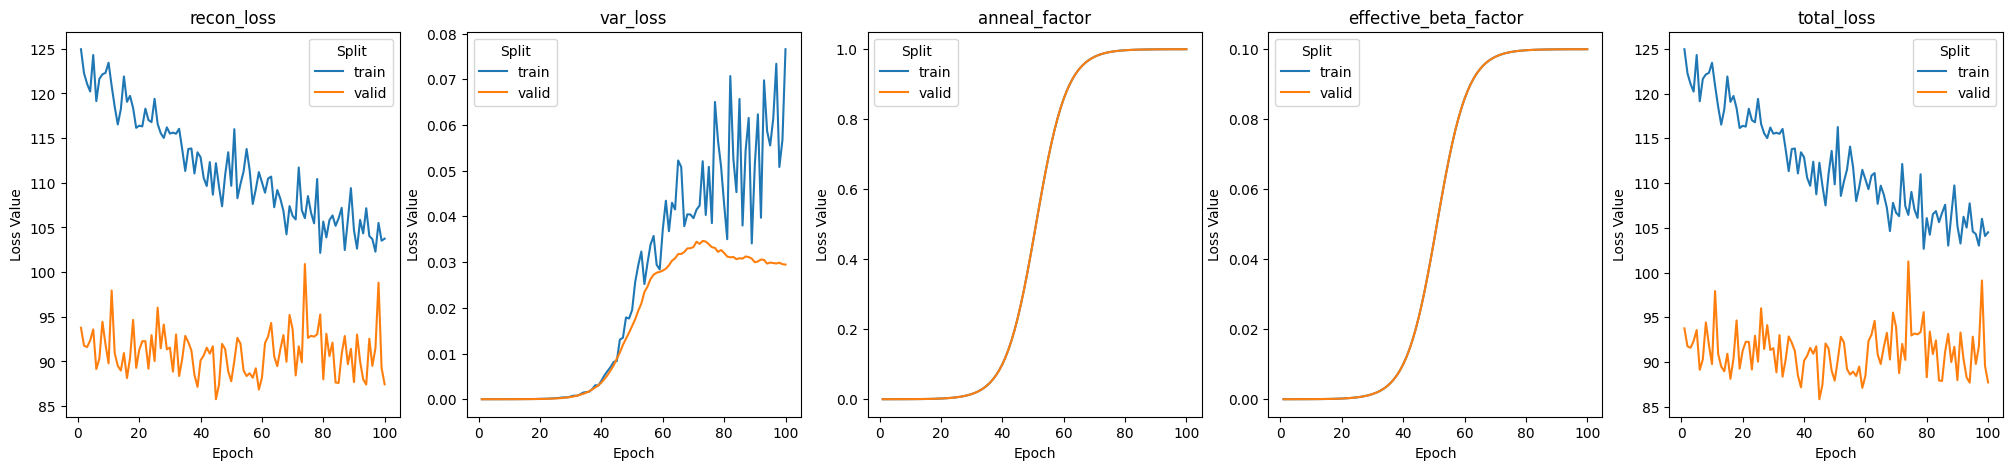

ValueError: No annotation data found. Please provide a valid annotation data type.

In [4]:
stackix.show_result()

In [ ]:
xmodalix = acx.XModalix(config=config)

In [ ]:
results = stackix._trainer._orchestrator.modality_results

In [ ]:
results["RNA"].sample_ids.get(epoch=-1, split="train")

In [ ]:
results["RNA"].reconstructions.get(epoch=-1)

In [ ]:
xmodalix.run()

In [ ]:

os.getcwd()